In [1]:
import matplotlib.pyplot as plt
from pprint import pprint
import MEArec as mr

In [2]:
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.curation as scur
import spikeinterface.widgets as sw


In [60]:
templates_params = mr.get_default_templates_params()
templates_params['probe'] = 'tetrode'
templates_params['n'] = 5
#templates_params['cell_types'] = ['simple']  

templates_params['xlim'] = [5, 150]    # Wider depth range (default: [10,80])
templates_params['ylim'] = [-100, 100]  # Much wider lateral range
templates_params['zlim'] = [-100, 100]  # Much wider vertical range
templates_params['rot'] = '3drot'       # Full 3D rotation instead of 'physrot'


cell_models_folder = mr.get_default_cell_models_folder()
tempgen = mr.gen_templates(
    cell_models_folder=cell_models_folder,
    params=templates_params,
    verbose=True
)
mr.save_template_generator(tempgen, 'data/sim_data/templates6.h5')


Setting n_jobs to 10 CPUs
Running with 10 jobs
Starting simulation 4/13 - cell: L5_DBC_bAC217_1

Starting simulation 5/13 - cell: L5_LBC_bAC217_1

Starting simulation 2/13 - cell: L5_BTC_bAC217_1

Starting simulation 6/13 - cell: L5_MC_bAC217_1

Starting simulation 1/13 - cell: L5_BP_bAC217_1

Starting simulation 3/13 - cell: L5_ChC_cACint209_1

Starting simulation 8/13 - cell: L5_NGC_bNAC219_1

Starting simulation 10/13 - cell: L5_STPC_cADpyr232_1

Starting simulation 7/13 - cell: L5_NBC_bAC217_1

Starting simulation 9/13 - cell: L5_SBC_bNAC219_1

Intracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_BTC_bAC217_1



Cell has already be simulated. Using stored membrane currents



Extracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_BTC_bAC217_1
Intracellular simulation: /Users/eashanmonga/.config/mearec/1.9.2/cell_models/bbp/L5_MC_bAC217_1



Cell has already be simulated. Using stored membrane currents



Extracellular si

In [61]:
tempgen = mr.load_templates('data/sim_data/templates6.h5')


# Generate recordings with fewer spike trains
recordings_params = mr.get_default_recordings_params()
recordings_params['spiketrains']['n_exc'] = 2
recordings_params['spiketrains']['n_inh'] = 2  
recordings_params['spiketrains']['duration'] = 20
recordings_params['recordings']['noise_level'] = 5

recgen = mr.gen_recordings(
    tempgen=tempgen,
    params=recordings_params,
    
)

# Save recordings
mr.save_recording_generator(recgen, 'data/sim_data/recordings6.h5')

Spiketrains seed:  1277
dtype float32
Noise Level  5
Templates selection seed:  4123
Selecting cells
Padding template edges
Elapsed pad time: 0.012770891189575195
Creating time jittering
Elapsed jitter time: 0.011344194412231445
Smoothing templates
Computing spike train SNR
Adding spiketrain annotations
Convolution seed:  7970
Electrode modulaton
Adding noise
Noise seed:  2241
Filtering
Band-pass cutoff [ 300. 6000.] Hz
Elapsed time:  0.28510829200968146


Recording shape: (1920000, 32)
Number of templates: 26
Sampling rate: 32000.0 Hz
Duration: 60.0 seconds


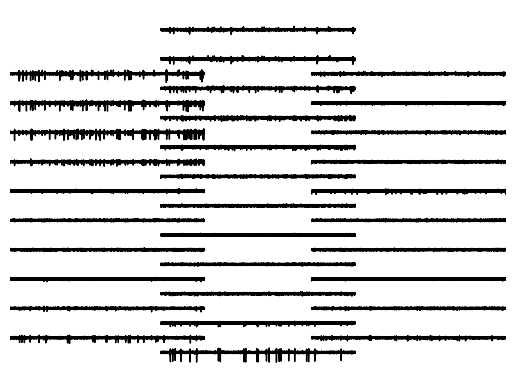

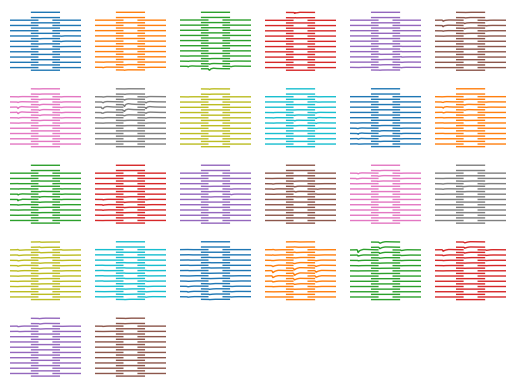

Number of neurons: 8
Neuron 0: 247 spikes
Neuron 1: 281 spikes
Neuron 2: 394 spikes
Neuron 3: 225 spikes
Neuron 4: 879 spikes
Neuron 5: 733 spikes
Neuron 6: 1122 spikes
Neuron 7: 924 spikes


In [66]:
import matplotlib.pyplot as plt

# Load your generated data
tempgen = mr.load_templates('data/sim_data/templates2.h5')
recgen = mr.load_recordings('data/sim_data/recordings2.h5')

# Inspect the data
print(f"Recording shape: {recgen.recordings.shape}")
print(f"Number of templates: {tempgen.templates.shape[0]}")
print(f"Sampling rate: {recgen.info['recordings']['fs']} Hz")
print(f"Duration: {recgen.info['recordings']['duration']} seconds")

# Plot the recordings
mr.plot_recordings(recgen, start_time=0, end_time=2)  # Plot first 2 seconds
plt.show()

# Plot templates
mr.plot_templates(tempgen)
plt.show()

# Access ground truth spike times
spike_times = recgen.spiketrains
print(f"Number of neurons: {len(spike_times)}")
for i, spikes in enumerate(spike_times):
    print(f"Neuron {i}: {len(spikes)} spikes")

In [47]:
print(f"Number of templates: {len(tempgen.templates)}")

Number of templates: 26


In [48]:
print("Cell types in this template:", tempgen.celltypes)
print("Number of each type:", {ct: list(tempgen.celltypes).count(ct) for ct in set(tempgen.celltypes)})

Cell types in this template: ['L5_BP_bAC217_1' 'L5_BP_bAC217_1' 'L5_BTC_bAC217_1' 'L5_BTC_bAC217_1'
 'L5_ChC_cACint209_1' 'L5_ChC_cACint209_1' 'L5_DBC_bAC217_1'
 'L5_DBC_bAC217_1' 'L5_LBC_bAC217_1' 'L5_LBC_bAC217_1' 'L5_MC_bAC217_1'
 'L5_MC_bAC217_1' 'L5_NBC_bAC217_1' 'L5_NBC_bAC217_1' 'L5_NGC_bNAC219_1'
 'L5_NGC_bNAC219_1' 'L5_SBC_bNAC219_1' 'L5_SBC_bNAC219_1'
 'L5_STPC_cADpyr232_1' 'L5_STPC_cADpyr232_1' 'L5_TTPC1_cADpyr232_1'
 'L5_TTPC1_cADpyr232_1' 'L5_TTPC2_cADpyr232_1' 'L5_TTPC2_cADpyr232_1'
 'L5_UTPC_cADpyr232_1' 'L5_UTPC_cADpyr232_1']
Number of each type: {'L5_MC_bAC217_1': 2, 'L5_NBC_bAC217_1': 2, 'L5_STPC_cADpyr232_1': 2, 'L5_LBC_bAC217_1': 2, 'L5_BP_bAC217_1': 2, 'L5_SBC_bNAC219_1': 2, 'L5_BTC_bAC217_1': 2, 'L5_TTPC1_cADpyr232_1': 2, 'L5_NGC_bNAC219_1': 2, 'L5_UTPC_cADpyr232_1': 2, 'L5_ChC_cACint209_1': 2, 'L5_TTPC2_cADpyr232_1': 2, 'L5_DBC_bAC217_1': 2}
